In [1]:
import altair as alt
from vega_datasets import data

source = data.cars()

In [2]:
source.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


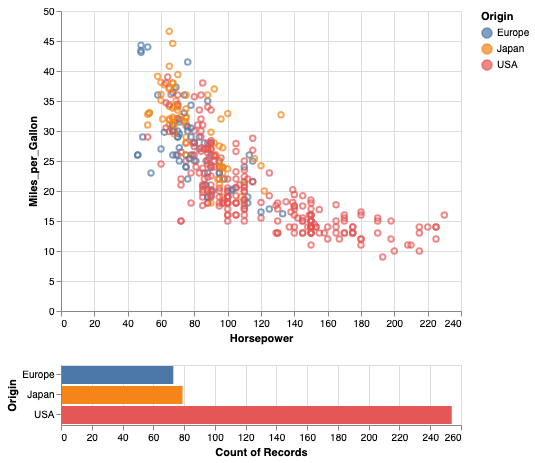

In [3]:
brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin',
    color='Origin',
    x='count(Origin)'
).transform_filter(
    brush
)

points & bars